# 회귀(Regression)
**[수업 목표]**
- 회귀가 무엇인지에 대해 이해한다
- 다양한 회귀의 종류에 대해서 설명할 수 있고 특징을 이해한다

## 4.1 단순선형회귀
하나의 독립 변수(X)와 하나의 종속 변수(Y) 간의 관계를 직선으로 모델링하는 방법.
### 하나의 독립변수와 종속변수와의 관계를 분석 및 예측
- 광고비(X)와 매출(Y) 간의 관계 분석.
- 현재의 광고비를 바탕으로 예상되는 매출을 예측 가능.

회귀 계수: [[2.9902591]]
절편: [4.20634019]
평균 제곱 오차(MSE): 0.9177532469714293
결정 계수(R2): 0.6521157503858555


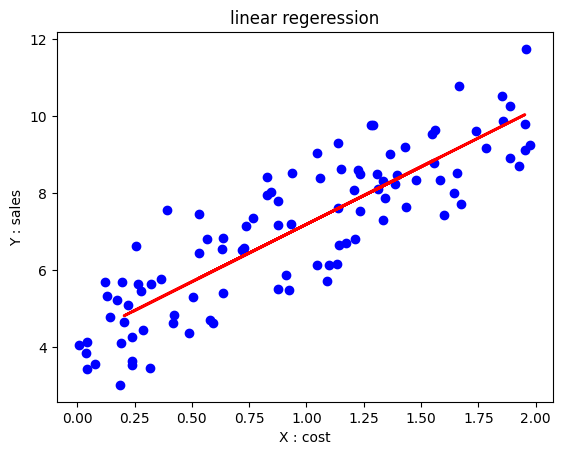

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 예시 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# 단순선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 회귀 계수 및 절편 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

# 모델 평가
mse = mean_squared_error(y_test, y_pred) #test용 먼저, 예측 나중에
r2 = r2_score(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R2):", r2)

# 시각화
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('linear regeression')
plt.xlabel('X : cost')
plt.ylabel('Y : sales')
plt.show()

LinearRegression() 클래스에서 `coef_`와 `intercept_`는 
**학습된 선형 회귀 모델의 계수(가중치)와 절편(편향)**을 나타냅니다

- coef_: 모델의 계수 또는 `기울기`입니다. 이 값은 𝑋의 변화에 따라 𝑦가 얼마나 변하는지를 나타냅니다. 다중 회귀에서는 각 특성에 대한 가중치가 포함되어 있으며, 여러 특성이 있으면 coef_는 배열이 됩니다.
- intercept_: 모델의 `절편` 또는 편향입니다. 이 값은 𝑋 = 0일 때 𝑦 의 예측값으로, 직선이 
𝑦-축과 만나는 지점을 의미합니다.

## 4.2 다중선형회귀
두 개 이상의 독립 변수(X1, X2, ..., Xn)와 하나의 종속 변수(Y) 간의 관계를 모델링.
### 두 개 이상의 독립 변수와 종속변수와의 관계를 분석 및 예측
- 다양한 광고비(TV, Radio, Newspaper)과 매출 간의 관계 분석.
- 현재의 광고비(TV, Radio, Newspaper)를 바탕으로 예상되는 매출을 예측 가능

In [ ]:
# 예시 데이터 생성
data = {'TV': np.random.rand(100) * 100,
        'Radio': np.random.rand(100) * 50,
        'Newspaper': np.random.rand(100) * 30,
        'Sales': np.random.rand(100) * 100}
df = pd.DataFrame(data)

# 독립 변수(X)와 종속 변수(Y) 설정
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size=0.2, random_state=42)

# 다중선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 회귀 계수 및 절편 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R2):", r2)

회귀 계수: [-0.02208636 -0.04524956  0.36955755]
절편: 47.47458066489462
평균 제곱 오차(MSE): 953.8458662397385
결정 계수(R2): -0.1404412078044821


## 4.3 범주형 변수
수치형 데이터가 아닌 주로 문자형 데이터로 이루어져 있는 변수가 범주형 변수
### 범주형 변수를 찾고 더미 변수로 변환한 후 회귀 분석 수행
- 성별, 근무 경력과 연봉 간의 관계.
- 성별과 근무 경력이라는 요인변수 중 성별이 범주형 요인변수에 해당
- 해당 변수를 더미 변수로 변환
- 회귀 수행

In [8]:
# 예시 데이터 생성
data = {'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
        'Experience': [5, 7, 10, 3, 8],
        'Salary': [50, 60, 65, 40, 55]}
df = pd.DataFrame(data)

# 범주형 변수 더미 변수로 변환# 범주형 변수 더미 변수로 변환
# 범주형 변수 더미 변수로 변환# 범주형 변수 더미 변수로 변환
# 범주형 변수 더미 변수로 변환# 범주형 변수 더미 변수로 변환
# drop_first = Gender_Male T/F , Gender_Female T/F 중복 제거
df = pd.get_dummies(df, drop_first=True) 

# 독립 변수(X)와 종속 변수(Y) 설정
X = df[['Experience', 'Gender_Male']]
y = df['Salary']

# 단순선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 회귀 계수 및 절편 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)

# 모델 평가
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R2):", r2)

회귀 계수: [ 2.57281553 -6.01941748]
절편: 40.63106796116506
평균 제곱 오차(MSE): 3.1067961165048588
결정 계수(R2): 0.9580162686958803


## 4.4 다항회귀, 스플라인 회귀
### 다항회귀
독립 변수와 종속 변수 간의 관계가 `선형이 아닐 때` 사용. 독립 변수의 다항식을 사용하여 종속 변수를 예측.
### 스플라인 회귀
독립 변수의 구간별로 다른 회귀식을 적용하여 복잡한 관계를 모델링


### 독립변수와 종속변수의 관계가 비선형 관계일 때 사용
- 주택 가격 예측(면적과 가격 간의 비선형 관계)



평균 제곱 오차(MSE): 9.447441952450275
결정 계수(R2): 0.9898873384220381


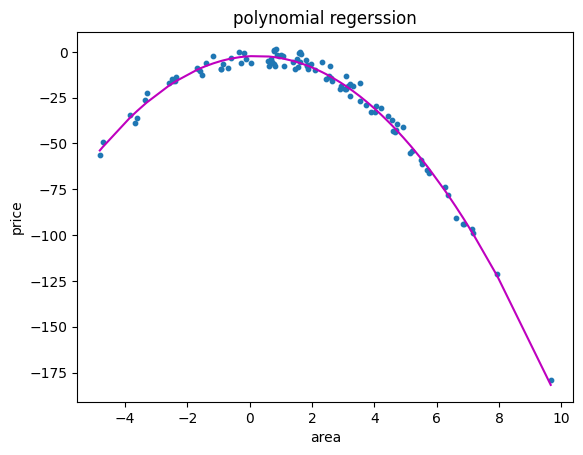

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# 예시 데이터 생성
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)
X = X[:, np.newaxis]

# 다항 회귀 (2차)
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

# 모델 평가
mse = mean_squared_error(y, y_poly_pred)
r2 = r2_score(y, y_poly_pred)
print("평균 제곱 오차(MSE):", mse)
print("결정 계수(R2):", r2)

# 시각화
plt.scatter(X, y, s=10)
# 정렬된 X 값에 따른 y 값 예측
sorted_zip = sorted(zip(X, y_poly_pred))
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.title('polynomial regerssion')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

`np.newaxis`는 NumPy에서 배열의 차원을 늘릴 때 사용하는 특별한 인덱싱 객체입니다. 기존 배열에 새로운 차원을 추가해 배열의 형태(shape)를 변경할 수 있습니다.

np.newaxis를 사용하면 1차원 배열을 2차원이나 3차원으로 변경하는 등, 배열의 차원을 자유롭게 늘릴 수 있습니다. 이를 통해 벡터와 행렬 연산을 더 쉽게 수행할 수 있습니다.

1. 1차원 배열을 2차원 배열로 변경하기
- 1차원 배열을 행 벡터(1행, N열) 또는 열 벡터(N행, 1열)로 변환할 수 있습니다.

In [16]:
import numpy as np

# 1차원 배열 생성
arr = np.array([1, 2, 3])

# 행 벡터로 변환 (1행, 3열)
row_vector = arr[np.newaxis, :]
print("행 벡터:\n", row_vector)
print("행 벡터의 형태:", row_vector.shape)  # (1, 3)

# 열 벡터로 변환 (3행, 1열)
col_vector = arr[:, np.newaxis]
print("열 벡터:\n", col_vector)
print("열 벡터의 형태:", col_vector.shape)  # (3, 1)


행 벡터:
 [[1 2 3]]
행 벡터의 형태: (1, 3)
열 벡터:
 [[1]
 [2]
 [3]]
열 벡터의 형태: (3, 1)


2. 다차원 배열에서 차원 추가하기
- 다차원 배열에서 특정 위치에 차원을 추가할 수도 있습니다.

In [17]:
# 2차원 배열 생성
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])

# 세 번째 차원 추가 (2, 3) -> (2, 3, 1)
expanded_arr = arr_2d[:, :, np.newaxis]
print("새로운 차원이 추가된 배열:\n", expanded_arr)
print("배열의 형태:", expanded_arr.shape)  # (2, 3, 1)

새로운 차원이 추가된 배열:
 [[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]
배열의 형태: (2, 3, 1)
